In [ ]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [5]:
print ("You are going to get a 100% on this Data Mining coursework.")

You are going to get a 100% on this Data Mining coursework.


## Human Resources Data

import data

In [6]:
data = pd.read_csv("Desktop/DataMining (IN3011)/Project/HR_data.csv")

clean data

In [7]:
data.rename(columns={'number_project':'projects'}, inplace = True)
data.rename(columns={'average_montly_hours':'avg_monthly_hours'}, inplace = True)
data.rename(columns={'time_spend_company':'time_spent_at_company'}, inplace = True)
data.rename(columns={'Work_accident':'work_accident'}, inplace = True)
data.rename(columns={'sales':'department'}, inplace = True)

In [23]:
cols = data.columns.tolist()
cols.insert(10, cols.pop(cols.index('left')))
data = data.reindex(columns= cols)

In [24]:
data.head(n=15)

,satisfaction_level,last_evaluation,projects,avg_monthly_hours,time_spent_at_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
5,0.41,0.50,2,153,3,0,0,sales,low,1
6,0.10,0.77,6,247,4,0,0,sales,low,1
7,0.92,0.85,5,259,5,0,0,sales,low,1
8,0.89,1.00,5,224,5,0,0,sales,low,1
9,0.42,0.53,2,142,3,0,0,sales,low,1


- satisfaction_level:      continuous
- last_evaluation:         continuous 
- avg_monthly_hours:       continuous
- department:              categorical
- salary:                  categorical
- projects:                discrete
- time_spent_at_company:   discrete
- work_accident:           discrete
- promotion_last_5years:   discrete

look at: min , max , mean , std , count

In [557]:
data.describe()

,satisfaction_level,last_evaluation,projects,avg_monthly_hours,time_spent_at_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


- It can be concluded that none of the columns have any missing data
- brief look at 'monthly hours' we can see it's quite high, a regular 9 to 5 job over a month totals = 160hours; std is also big here
- most people have been at the company for around 3 years, which can be deduced by the 50% percentile value

## Further (in depth) Exploration / Statistical Inference

Satisfaction Level

In [228]:
satis = data.satisfaction_level
satis.median()

0.64

In [432]:
satis.mode()

0    0.1
dtype: float64

Notes/Comments: 
- mode isn't really helpful at the moment (this is also due to the fact that satisfaction is continuous), later looking at the data visually we can see that we could expect it to be bimodal

In [179]:
st.describe(satis)

DescribeResult(nobs=14999, minmax=(0.089999999999999997, 1.0), mean=0.61283352223481558, variance=0.061817200647087629, skewness=-0.47631270075042725, kurtosis=-0.6710350084807528)

Comments/Notes
- Mean: 61.3% , it can be assumed the workers are generally happy, nothing too outstanding initially
- Median: 64% , inline with the mean
- Mode: due to the nature of the distribution, no serious information can be deduced at this point, only perhaps the guess that 'satisfaction_level' may be bi-modal
- Skewness: slightly negatively skewed, i.e. pulled to the left
- Kurtosis: slight negative kurtosis
- Variance: 0.06

Visual observations

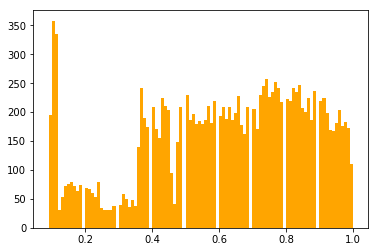

In [244]:
plt.hist(satis, bins = 100, color = 'orange');

Notes/Comments
- while it looks like 60% of the employees are generally pleased, a very small amount of employees are extremely displeased
- this plot is also in line with our assumption that there are 2 modes, (one below the 0.2 mark and one above 0.4)

Look at correspondance between low satisfaction rate and work accidents

In [435]:
low_satis = data[satis < 0.3]
high_satis = data[satis >= 0.5]

In [437]:
print ((np.sum(low_satis.work_accident) / float(len(low_satis)))*100)
print (np.sum(high_satis.work_accident) / float(len(high_satis))*100)

11.7245005258
16.1866359447


Notes/Comments:
- we can see that 11% of the employees who have low satisfaction had an accident
- likewise, 16% with high satisfaction had an accident, which is weird (one would expect that high_satisfaction would be accompanied by fewer accidents; drawing from the problem domain we can guess that maybe those workers who have had an accident may have been compensated in some way, thus the high satisfaction)

In [439]:
print ((np.mean(low_satis.last_evaluation))*100)
print ((np.mean(high_satis.last_evaluation))*100)

78.1650893796
74.0814132104


- this tells us that those people who have low satisfaction are also getting high evaluations (possibly for their hard work)

Last Evaluation

In [440]:
l_eval = data.last_evaluation

In [575]:
print (l_eval.median())
print (l_eval.mode())

0.72
0    0.55
dtype: float64


In [576]:
st.describe(l_eval)

DescribeResult(nobs=14999, minmax=(0.35999999999999999, 1.0), mean=0.7161017401160078, variance=0.029298864431563071, skewness=-0.0266190874373217, kurtosis=-1.2390272795182624)

Comments/Notes
- Mean: quite high at around 71.6% so it can be guessed that a large number of employees are working well
- Median: 72% in line with mean, no massive gap
- Mode: most occuring value is 55% which goes against the assumption that most of the workers got a good evaluation, now we can assume that a minority of very highly evaluated workers are pulling up the average (what makes workers get evaluated high?)
- Skewness: slightly negatively skewed
- Kurtosis: -1.2 so there is an inverse bump accompanied big some "shoulders"
- Variance: very little, at 0.029

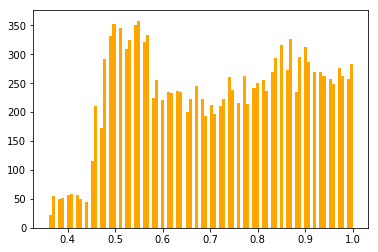

In [263]:
plt.hist(l_eval, bins = 100, color = 'orange');

Comments/Notes
- we can definitely see an inverse bump, as well as a high left shoulder visually seeing the mode at around 50-55%, but also observing that the second highest rating is around 87-89%. Basically there is a cluster of people getting bad scores and ones getting high scores

Number of Projects

In [577]:
num_p = data.projects

In [579]:
print (num_p.median())
print (num_p.mode())

4.0
0    4
dtype: int64


In [580]:
st.describe(num_p)

DescribeResult(nobs=14999, minmax=(2, 7), mean=3.8030535369024601, variance=1.5192839143892429, skewness=0.3376718386088254, kurtosis=-0.49571279698843007)

Comments/Notes
- Mean: mean projects per employee is around 4
- Median: median is in line with the mean at 4
- Mode: again, 4
- Skewness: slight positive skew, i.e. pulled to the right
- Kurtosis: slightly negative
- Variance: 1.5, not massive still not terribly small

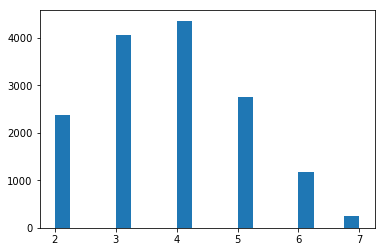

In [202]:
plt.hist(num_p, bins = 20);

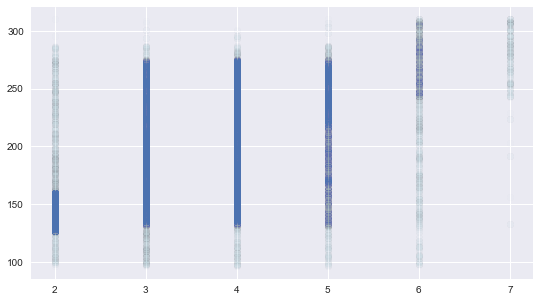

In [450]:
plt.scatter(data.projects, data.avg_monthly_hours, alpha = 0.009)

Notes/Comments:
- number of projects compared against average monthly hours shows that employees working normal hours get around 2 projects, ones receiving 3-4 projects are working a lot!, there are few people employees working very hard on 6-7 projects

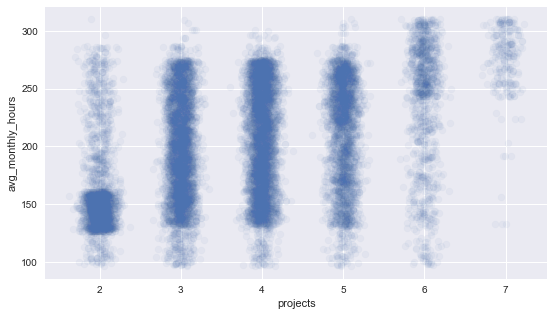

In [590]:
plt.xlabel('projects')
plt.ylabel('avg_monthly_hours')
plt.scatter(data.projects + st.norm.rvs(loc = 0, scale = 0.1, size = len(data.projects)), data.avg_monthly_hours, alpha = 0.05)

Average Monthly Hours

In [451]:
avgmh = data.avg_monthly_hours

In [598]:
print (avgmh.median())
print (avgmh.mode())
print (avgmh.value_counts().head())

200.0
0    135
1    156
dtype: int64
156    153
135    153
149    148
151    147
160    136
Name: avg_monthly_hours, dtype: int64


- upon closer inspection it seems that there are exactly 153 employees working 156 and 135 hours, thus we have 2 modes (note: programin is treating data as discrete here, whereas we need to look at it from as continuous data

In [456]:
st.describe(avgmh)

DescribeResult(nobs=14999, minmax=(96, 310), mean=201.05033668911261, variance=2494.3131748099559, skewness=0.05283670471826943, kurtosis=-1.1350032510931285)

Comments/Notes
- Mean: very high at around 200
- Median: 200
- Mode: 135 and 156 (seems usual, an interesting thing will be to look at which department contributes to this statistic)
- Skewness: above zero, 0.05
- Kurtosis: negative at -1.13, inverse bump exptected
- Variance: variance is very high at 2494.31

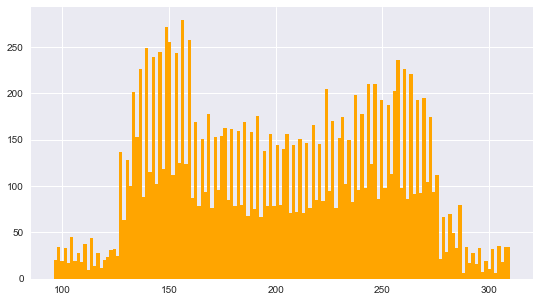

Time Spent at the Company

In [460]:
tpc = data.time_spent_at_company

In [607]:
print (tpc.median())
print (tpc.mode())

3.0
0    3
dtype: int64


In [217]:
st.describe(tpc)

DescribeResult(nobs=14999, minmax=(2, 10), mean=3.4982332155477032, variance=2.1319978117223641, skewness=1.8531336980238529, kurtosis=4.771219697202597)

Comments/Notes
- Mean: 3.49
- Median: 3
- Mode: 3, workers have been around for about 3 years
- Skewness: 1.85, i.e. pulled to the right (there must be some "veterans" at the company)
- Kurtosis: high at around 4.77
- Variance: high at 2.13

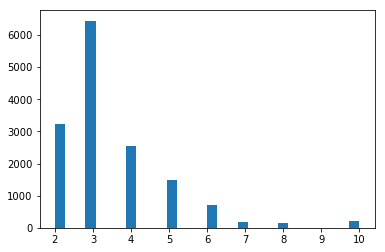

In [218]:
plt.hist(tpc, bins = 30);

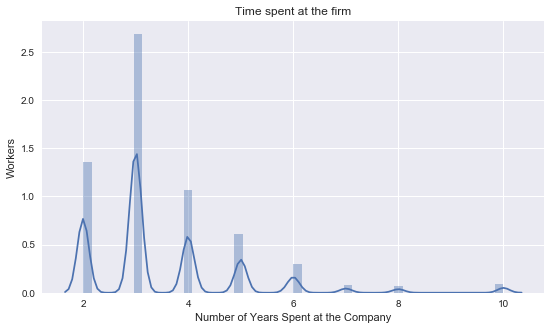

In [463]:
sb.distplot(data['time_spent_at_company'])
plt.title('Time spent at the firm')
plt.xlabel('Number of Years Spent at the Company')
plt.ylabel('Workers')
plt.show()

Notes/Comments:
- it seems the company is reluctant to promote employees, mode is 3 and very few 10 year employees.

Number of Work Accidents

In [608]:
wa = data.work_accident
wa.value_counts()

0    12830
1     2169
Name: work_accident, dtype: int64

- around 14.5% of employees had accidents

In [465]:
wa.median()

0.0

In [221]:
wa.mode()

0    0
dtype: int64

In [223]:
st.describe(wa)

DescribeResult(nobs=14999, minmax=(0, 1), mean=0.14460964064270951, variance=0.12370594008840931, skewness=2.0209466044923268, kurtosis=2.084225178209066)

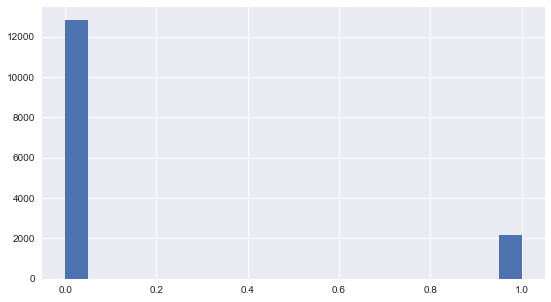

In [466]:
plt.hist(wa, bins = 20);

Promotion in the last 5 years

In [617]:
pp = data.promotion_last_5years
pp.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [470]:
pp.median()

0.0

In [80]:
pp.mode()

0    0
dtype: int64

In [82]:
st.describe(pp)

DescribeResult(nobs=14999, minmax=(0, 1), mean=0.021268084538969265, variance=0.020817141020940708, skewness=6.636304620996621, kurtosis=42.04053902266111)

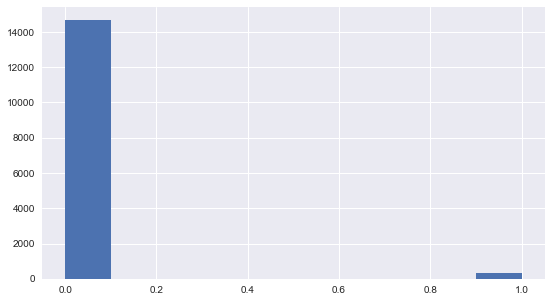

In [471]:
plt.hist(pp, bins = 10);

Department within company

In [474]:
data.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

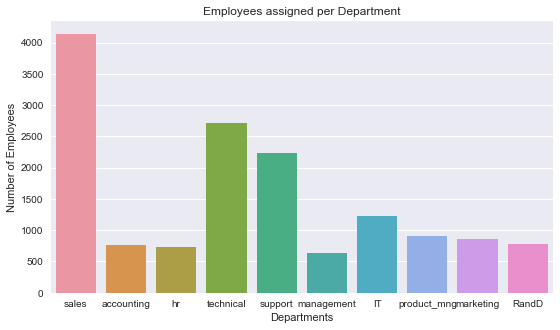

In [475]:
sb.countplot(x='department', data=data,)
plt.xlabel('Departments')
plt.ylabel('Number of Employees')
plt.title('Employees assigned per Department') 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.gcf().set_size_inches(*fig_size)
plt.show()

Comments/Notes
- looks like Sales has the highest number of employees, followed by Technical, Support, and lastly IT

Salary

In [476]:
data.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Further exploration using Plots
(for some comparisons)

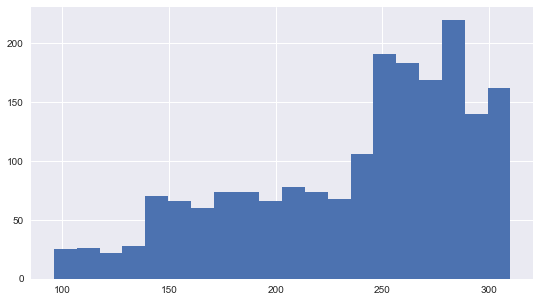

In [485]:
plt.hist(low_satis.avg_monthly_hours, bins = 20);

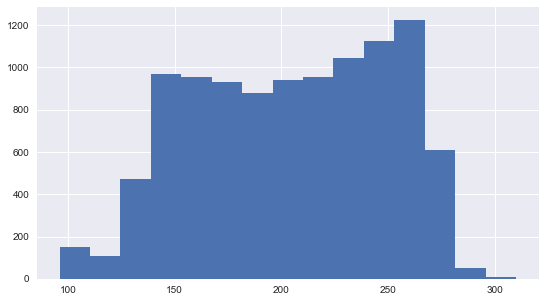

In [487]:
plt.hist(high_satis.avg_monthly_hours, bins = 15);

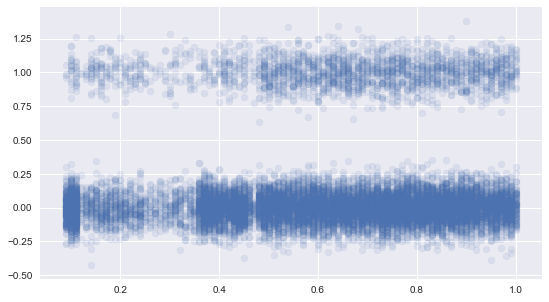

In [488]:
plt.scatter(satis,wa+st.norm.rvs(loc=0, scale = 0.1, size= len(wa)),alpha = 0.1);

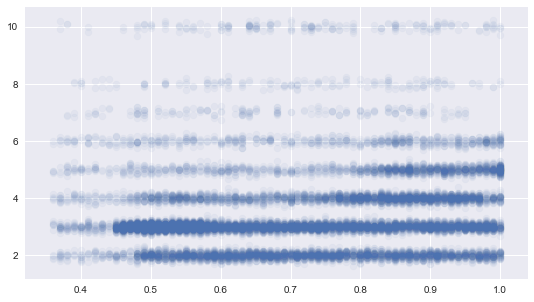

In [494]:
plt.scatter(l_eval,tpc+st.norm.rvs(loc=0, scale = 0.1, size= len(wa)),alpha = 0.05);

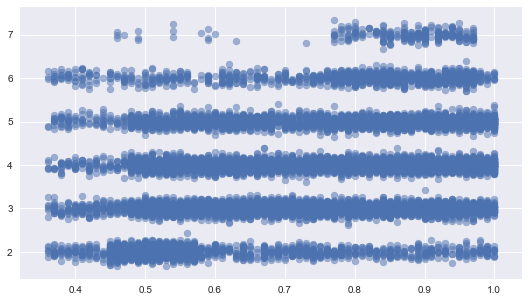

In [497]:
plt.scatter(l_eval,num_p+st.norm.rvs(loc=0, scale = 0.1, size= len(wa)),alpha = 0.5);

Visualisations - 2 : in 2D vs 3D

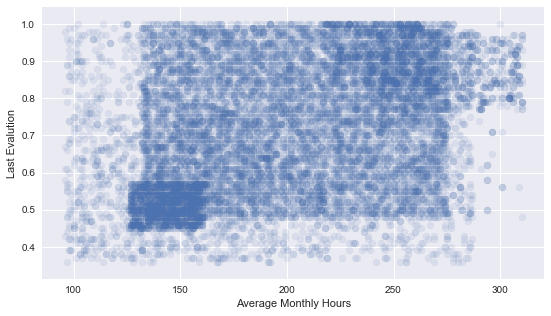

In [643]:
plt.xlabel('Average Monthly Hours')
plt.ylabel('Last Evalution')
#plt.title('avg. monthly hrs vs. last evalution') 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.gcf().set_size_inches(*fig_size)
plt.scatter(avgmh,l_eval,alpha = 0.1);
plt.show()

Notes/Comments
- this scatter seems to indicate that there is a concentration of employees who work average hours (8h work day, as can be seen since the square spans across the 130-160h mark), however receieve a poor evaluation score
- this graph also shows that there are mainly 3 types of employees, (indicated by the 3 rectangles)

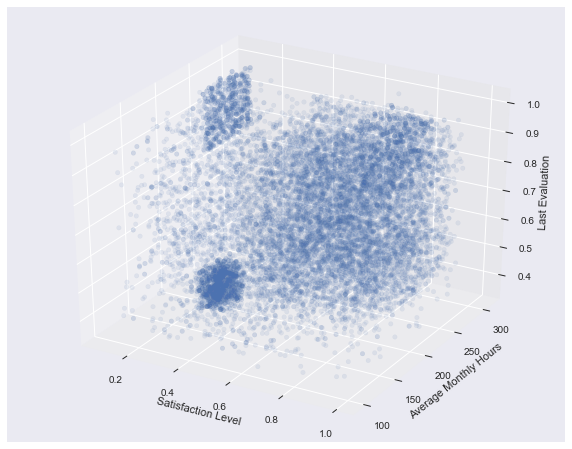

In [54]:
width = 10
height = 8
fig = plt.figure(figsize=(width, height))
ax = fig.add_subplot(111, projection='3d')
x = data['satisfaction_level']
y = data['avg_monthly_hours']
z = data['last_evaluation']
c = data['projects']
ax.scatter(xs=x, ys=y, zs=z, alpha = 0.10)
ax.set_xlabel('Satisfaction Level')
ax.set_ylabel('Average Monthly Hours')
ax.set_zlabel('Last Evaluation')
plt.show()

Comments/Notes
- the black "plate" at the back represents employees who spend incredible amounts of time at the company, working on numerous projects, but currently not satisfied despite given a high rating for hard work. 
- in comparison, the white cluster is what the dark blue square represents on the 2D scatter plot. This plot shows some additional information indicating that this group is not really satisfied even though they receive a considerble amount of fewer projects than their colleagues
- an important note to consider is both groups are at the far end of on the 'satisfaction level' spectrum, thus we can conlcude that few or considrably high number of projects lead to low satisfaction (+ average working hours are vastly different)

In [29]:
pd.options.mode.chained_assignment = None
data['workhorses'] = 0
data['workhorses'][(data['projects'] >= 6) & (data['avg_monthly_hours'] > 200) & (data['satisfaction_level'] < 0.130) & (data['last_evaluation'] > 0.8)] = 1
workhorsedf = data[data['workhorses'] == 1]

We can identify 582 employees who fit the 'disengaged' description according to this analysis.


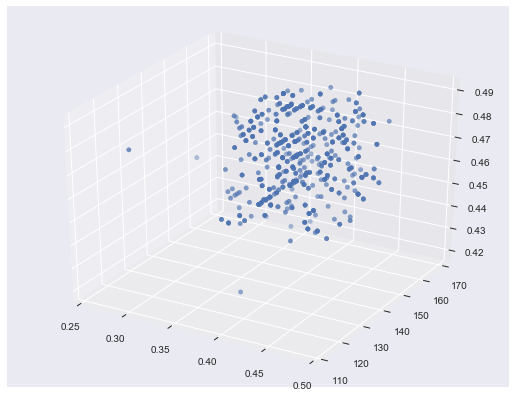

In [51]:
data['disengaged'] = 0
data['disengaged'][(data['projects'] <= 2) & (data['avg_monthly_hours'] <= 170) & (data['avg_monthly_hours'] > 110) & (data['satisfaction_level'] < 0.50) & (data['satisfaction_level'] > 0.20) & (data['last_evaluation'] < 0.50) & (data['last_evaluation'] > 0.41)] = 1
print("We can identify {} employees who fit the 'disengaged' description according to this analysis.".format(len(data[data['disengaged'] == 1])))

disengageddf = data[data['disengaged'] == 1]

fig = plt.figure()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
plt.gcf().set_size_inches(*fig_size)
ax = fig.add_subplot(111, projection='3d')
x = disengageddf['satisfaction_level']
y = disengageddf['avg_monthly_hours']
z = disengageddf['last_evaluation']
_ = ax.scatter(xs=x, ys=y, zs=z)
plt.show()

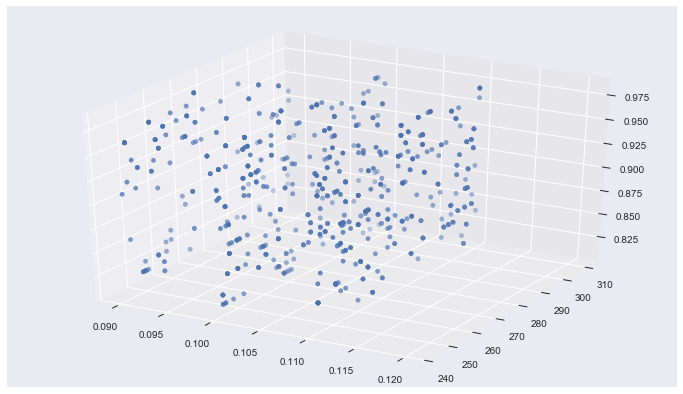

In [52]:
workhorsedf = data[data['workhorses'] == 1]

fig = plt.figure()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
plt.gcf().set_size_inches(*fig_size)
ax = fig.add_subplot(111, projection='3d')
x = workhorsedf['satisfaction_level']
y = workhorsedf['avg_monthly_hours']
z = workhorsedf['last_evaluation']
_ = ax.scatter(xs=x, ys=y, zs=z)
plt.show()

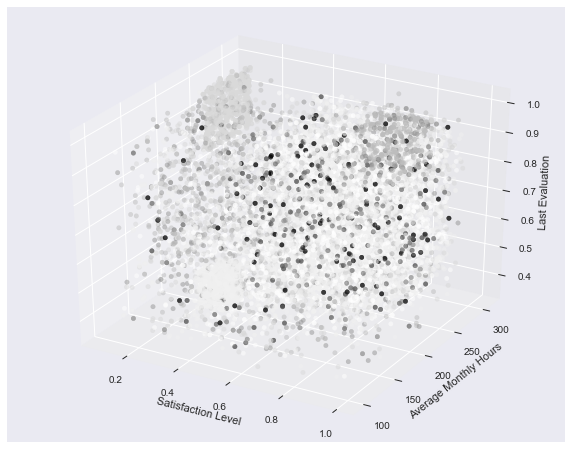

In [639]:
width = 10
height = 8
fig = plt.figure(figsize=(width, height))
ax = fig.add_subplot(111, projection='3d')
x = data['satisfaction_level']
y = data['avg_monthly_hours']
z = data['last_evaluation']
c = data['time_spent_at_company']
ax.scatter(xs=x, ys=y, zs=z, c=c, alpha = 0.5)
ax.set_xlabel('Satisfaction Level')
ax.set_ylabel('Average Monthly Hours')
ax.set_zlabel('Last Evaluation')
plt.show()

Notes/Comments:
- we can infer that there is a cluster of employees who ARE satisfied, despite long hours (and according to the graph above numerous projects), while also being evaluated high for their work (referred to as "experts" from now on).
- another crucial point is that the "disconcerned" group (low to normal hours, low eval, low satisfaction, few projects) are also quite new to the firm. Wherehas the "powerhouses" (high hours, high eval, lots of hours) have been at the company for a little longer (still less than the "experts" though)
- Hypothesis: drawing from the problem domain, one possible reason for workers leaving (or general issue at the firm) could be the common problem that the firm is not giving it's new comers adequate work (being the cause of disconcern and detachment from the firm), and overworking the employees that already acquired the skills to be successfull (leading to exhaustation thus low satisfaction). This could be due to bad management - in a real scenario this would be a point to dig deeper.

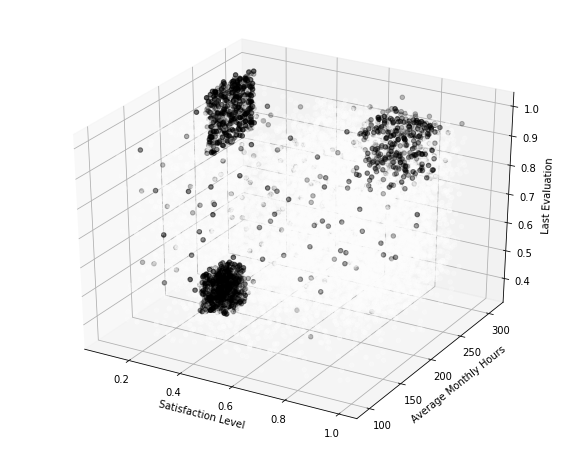

In [52]:
width = 10
height = 8
fig = plt.figure(figsize=(width, height))
ax = fig.add_subplot(111, projection='3d')
x = data['satisfaction_level']
y = data['avg_monthly_hours']
z = data['last_evaluation']
cc = data['left']
ax.scatter(xs=x, ys=y, zs=z, c=cc, alpha = 0.25, cmap='gray_r')
ax.set_xlabel('Satisfaction Level')
ax.set_ylabel('Average Monthly Hours')
ax.set_zlabel('Last Evaluation')
plt.show()

Notes/Comments:
- we can see that the 3 main groups are all leaving the company (note: ALL). This is unexected. 
- Hypothesis #1: "powerhouses" leaving becuase they are over-worked by the comoany
- Hypothesis #2: "disconcerned" employees leaving because they are bored of redudant of work
- Hypothesis #3: "experts" leave for a possible 2 reasons, either they retire (ones being at the comoany for 10 years), or they simply move on becasue they are overqualifed and/or receieve a higher paying position elsewhere

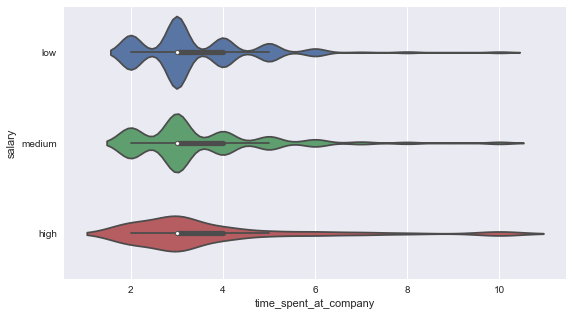

In [529]:
sb.violinplot(x='time_spent_at_company', y='salary', data=data)
plt.show()

Notes/Comments:
- it seems that there is no comensation by the firm for loyalty (i.e. workers staying at the firm for a longer period of time). This could be why people are leaving.

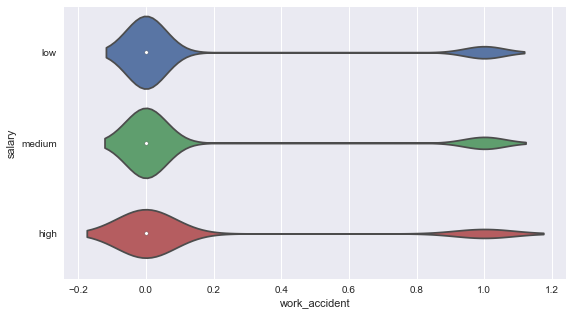

In [616]:
sb.violinplot(x='work_accident', y='salary', data=data)
plt.show()

In [421]:
data.head()

,satisfaction_level,last_evaluation,projects,avg_monthly_hours,time_spent_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [423]:
had_accident = data[ data.work_accident == 1 ]
no_accident = data[ data.work_accident == 0 ]

In [424]:
had_accident.head()

,satisfaction_level,last_evaluation,projects,avg_monthly_hours,time_spent_at_company,work_accident,left,promotion_last_5years,department,salary
18,0.45,0.51,2,160,3,1,1,1,sales,low
68,0.76,0.86,5,223,5,1,1,0,product_mng,medium
120,0.14,0.62,4,158,4,1,1,0,technical,low
123,0.11,0.84,6,300,5,1,1,0,support,low
136,0.10,0.84,6,283,4,1,1,0,technical,low


In [498]:
had_accident.department.value_counts() / len(had_accident)

sales          0.270632
technical      0.175657
support        0.159059
IT             0.075611
marketing      0.063624
RandD          0.061780
product_mng    0.060858
management     0.047487
accounting     0.044260
hr             0.041033
Name: department, dtype: float64

In [427]:
no_accident.department.value_counts() / len(no_accident)

sales          0.276929
technical      0.182307
support        0.146843
IT             0.082853
product_mng    0.060016
marketing      0.056118
accounting     0.052299
RandD          0.050896
hr             0.050663
management     0.041076
Name: department, dtype: float64

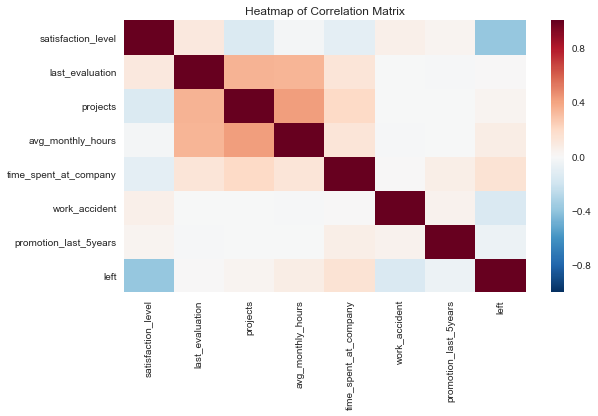

In [6]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.gcf().set_size_inches(*fig_size)
corr = data.corr()
corr = (corr)
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sb.plt.title('Heatmap of Correlation Matrix')

In [ ]:
plt.figure(figsize=(10, 10))
sb.pairplot(data, hue="left");

In [9]:
hr_by_left = data.groupby('left')
employees_left = hr_by_left.get_group(1)
employees_stayed = hr_by_left.get_group(0)

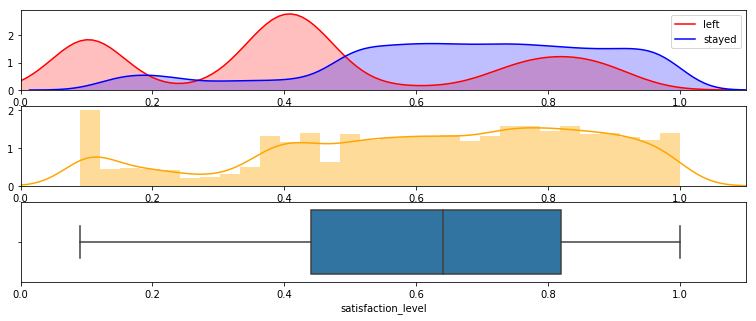

In [14]:
fig, axs = plt.subplots(nrows= 3, figsize=(13, 5))
sb.kdeplot(employees_left.satisfaction_level, ax=axs[0], shade=True, color="r")
kde_plot = sb.kdeplot(employees_stayed.satisfaction_level, ax=axs[0], shade=True, color="b")
kde_plot.legend(labels=['left', 'stayed'])
hist_plot = sb.distplot(data.satisfaction_level, ax=axs[1], bins = 30, color = 'orange')
box_plot = sb.boxplot(data.satisfaction_level, ax=axs[2])
kde_plot.set(xlim=(0,1.1))
hist_plot.set(xlim=(0,1.1))
box_plot.set(xlim=(0,1.1));

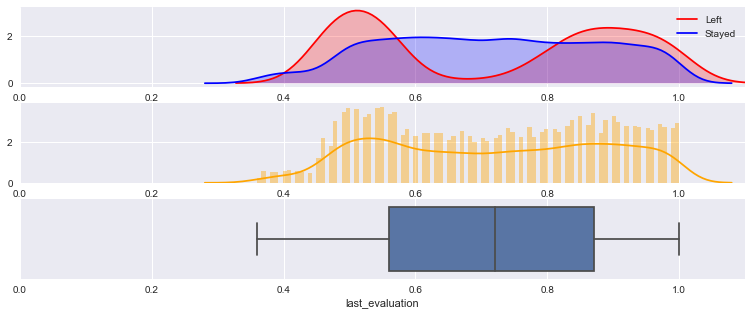

In [641]:
fig, axs = plt.subplots(nrows= 3, figsize=(13, 5))

sb.kdeplot(employees_left.last_evaluation, ax=axs[0], shade=True, color="r")
kde_plot = sb.kdeplot(employees_stayed.last_evaluation, ax=axs[0], shade=True, color="b")
kde_plot.legend(labels=['Left', 'Stayed'])

hist_plot = sb.distplot(data.last_evaluation, ax=axs[1], bins = 100, color = 'orange')
box_plot = sb.boxplot(data.last_evaluation, ax=axs[2])

kde_plot.set(xlim=(0,1.1))
hist_plot.set(xlim=(0,1.1))
box_plot.set(xlim=(0,1.1));

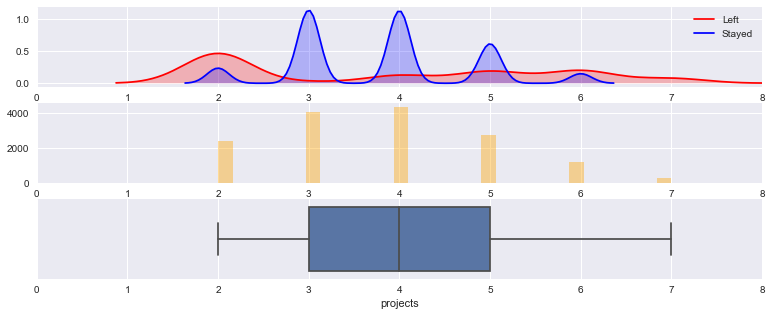

In [599]:
fig, axs = plt.subplots(nrows= 3, figsize=(13, 5))

sb.kdeplot(employees_left.projects, ax=axs[0], shade=True, color="r")
kde_plot = sb.kdeplot(employees_stayed.projects, ax=axs[0], shade=True, color="b")
kde_plot.legend(labels=['Left', 'Stayed'])

hist_plot = sb.distplot(data.projects, ax=axs[1], kde=False, color = 'orange')
box_plot = sb.boxplot(data.projects, ax=axs[2])

kde_plot.set(xlim=(0,8))
hist_plot.set(xlim=(0,8))
box_plot.set(xlim=(0,8));

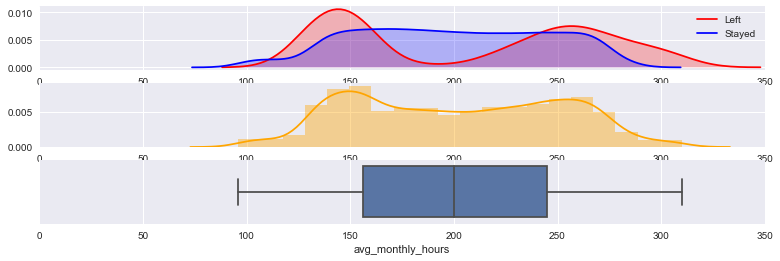

In [19]:
fig, axs = plt.subplots(nrows=3, figsize=(13, 4))

sb.kdeplot(employees_left.avg_monthly_hours, ax=axs[0], shade=True, color="r")
kde_plot = sb.kdeplot(employees_stayed.avg_monthly_hours, ax=axs[0], shade=True, color="b")
kde_plot.legend(labels=['Left', 'Stayed'])

hist_plot = sb.distplot(data.avg_monthly_hours, ax=axs[1], color = 'orange', bins=20)
box_plot = sb.boxplot(data.avg_monthly_hours, ax=axs[2])

kde_plot.set(xlim=(0,350))
hist_plot.set(xlim=(0,350))
box_plot.set(xlim=(0,350));

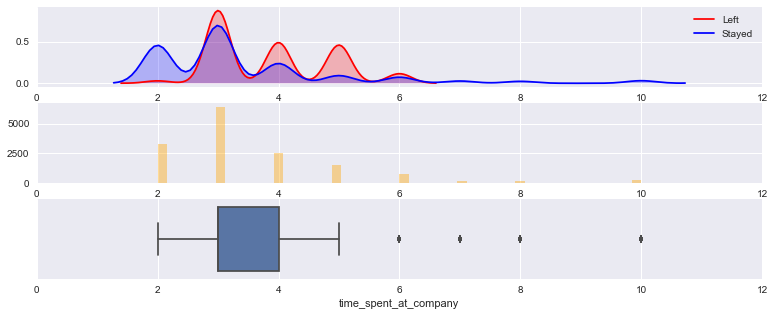

In [606]:
fig, axs = plt.subplots(nrows= 3, figsize=(13, 5))

sb.kdeplot(employees_left.time_spent_at_company, ax=axs[0], shade=True, color="r")
kde_plot = sb.kdeplot(employees_stayed.time_spent_at_company, ax=axs[0], shade=True, color="b")
kde_plot.legend(labels=['Left', 'Stayed'])

hist_plot = sb.distplot(data.time_spent_at_company, ax=axs[1], kde=False, color = 'orange')
box_plot = sb.boxplot(data.time_spent_at_company, ax=axs[2])

kde_plot.set(xlim=(0,12))
hist_plot.set(xlim=(0,12))
box_plot.set(xlim=(0,12));